<a href="https://colab.research.google.com/github/AlessioCampanelli/MachineLearning-games/blob/master/games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Identification
# assign the following string values
yourNameSurname='Alessio Campanelli'
yourMatricolaNumber='1314022'
yourStudentEMAIL='campanelli.1314022@studenti.uniroma1.it'

# Machine Learning 2020/2021 - Challenge 

#### 1. Mandatory Rules
#### 2. The Dataset
- #### 2.1 Load the dataset
- #### 2.2 Dataset Analysis

#### 3. Classification
- #### 3.1 Preprocessing
- #### 3.2 Model Selection
- #### 3.3 Evaluation

#### 4. Summary


<hr>

## 1. Mandatory Rules (read carefully):
- This year the results of the challenges will count 8/30 of your final score.
- Only one submission is allowed. We will not consider multiple submissions.
- Please remember your solution must be <b>"YOUR SOLUTION"</b>, hence you are requested to deliver your individual answers/arguments/opinions/critics.
- Mail your solution (a <b>jupyter notebook</b>) only to stefano.faralli@unitelmasapienza.it <b>10 days before the date of a written exam (NO EXCEPTIONS)</b> if you miss to deliver your solution you must wait the next (if any) available deadline. 
- The subject of your email must be: "[Challenge_solution] NAME - SURNAME - MATRICOLA".
- Double check the subject of your email and the attachments.
- In case you want to compress the attachment, <b>USE ONLY STANDARD ZIP compression</b> (NO RAR,7Z etc..).
- <b>Please sumbit ONLY the notebook with SAVED OUTPUTS!</b>.
- Your solution might be considered as the "copy" of others solutions, in that specific case the resulting score for all involved students will be 0/8.
- Then read carefully all the part of the jupyter notebook and fill all fields.
- <b>solutions (and correspondig points) are evaluated mainly on your thoughts/comments/opinions</b>.  
- If you have questions <b>Don't write "personal" emails</b> to Stefano Faralli, instead <b>use our google group</b>.
- A solution having a summary discussion with less than 500 words is evaluated with 0 points.

<hr>

## 2. The Dataset (up to 1/8 points)
<img width='400' src='videogames.jpg'/>

- The topic of the challenge is "Video games";
- The dataset consists of one single csv file ("video_games.csv");
- The full description of the dataset is available at: <a href='https://corgis-edu.github.io//corgis/csv/video_games/'>github project page</a>;

[1] Cox, Joe. “What makes a blockbuster video game? An empirical analysis of US sales data.” Managerial and Decision Economics 35.3 (2014): 189-198

## 2.1 Load the Dataset (up to 0.2/8 points)
In the following two cells: a code cell and, a markdown cell, where: 
- you write the code to create a pandas DataFrame by loading the "video_games.csv" file.  
- you describe the problems and the solution for loading the same csv file to a numpy datastructure.

In [ ]:
# write here the code for 2.1 Load the Dataset

import pandas as pd
df = pd.read_csv("video_games.csv")

your answers for 2.1 Load the Dataset

In order to obtain a numpy datastructure you can use the method `to_numpy` of pandas Dataframe:
```
dfnp = df.to_numpy()
```


## 2.2 Dataset Analysis (up to 0.8/8 points)
In the following code cell (feel free to create new cells), remember to comment your code snippets:

1) Print the total number of samples;

2) Print a table with the first 15 samples;

3) Plot the histogram distribution of "Features.Handheld?";

4) Plot the histogram distribution of "Features.Online?";

5) Plot the histogram distribution of "Metadata.Publishers";	

6) Perform feature importance analysis; 

In [ ]:
# write here the code for 2.2 Dataset Analysis

# 1) Print the total number of samples;
print("Number of samples", df.shape[0])
print("Number of features", df.shape[1])

Number of samples 1212
Number of features 36


In [ ]:
# 2) Print a table with the first 15 samples;

from IPython.display import display 
display(df.iloc[:15,:])

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Release.Re-release?,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,True,2004,22.716667,31.900000,24.483333,57,14.300000,29.766667,35.033333,30.000000,20,22.016667,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,True,2004,10.100000,11.016667,10.000000,5,9.516667,0.000000,0.000000,0.000000,0,0.000000,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,True,2004,4.566667,11.566667,2.500000,57,2.266667,10.000000,14.100000,7.250000,16,6.800000,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,True,2004,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,True,2004,13.250000,48.383333,10.000000,37,7.066667,72.566667,78.866667,72.566667,2,66.283333,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333
5,The Urbz: Sims in the City,True,1,True,True,Simulation,True,EA,True,67,0.41,12.95,Nintendo DS,M,True,2004,21.933333,25.500000,20.000000,7,16.733333,30.033333,30.033333,30.033333,2,30.033333,20.833333,25.200000,20.000000,3,16.450000,15.500000,15.750000,15.500000,2,15.250000
6,Ridge Racer,True,1,True,True,Racing / Driving,True,Namco,True,88,0.36,19.95,Sony PSP,E,True,2004,0.816667,1.050000,0.883333,6,0.583333,1.250000,1.250000,1.250000,1,1.250000,0.883333,0.933333,0.883333,2,0.833333,0.616667,0.783333,0.533333,3,0.450000
7,Metal Gear Ac!d,True,1,True,True,Strategy,True,Konami,True,75,0.34,17.95,Sony PSP,E,True,2004,25.383333,51.650000,21.266667,18,19.166667,80.000000,80.000000,80.000000,1,80.000000,24.833333,27.483333,25.100000,6,21.916667,20.700000,23.600000,20.783333,11,17.883333
8,Madden NFL 2005,True,1,True,True,Sports,True,EA,True,68,0.25,8.95,Nintendo DS,T,True,2004,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
9,Pokmon Dash,True,1,True,True,Racing / Driving,True,Nintendo,True,46,0.22,24.95,Nintendo DS,T,True,2004,3.833333,7.250000,1.183333,4,1.750000,12.000000,12.000000,12.000000,1,12.000000,0.000000,0.000000,0.000000,0,0.000000,1.116667,1.200000,1.083333,3,1.050000


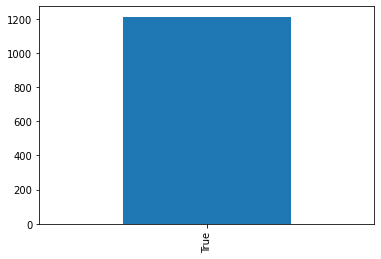

In [ ]:
# 3) Plot the histogram distribution of "Features.Handheld?";

df['Features.Handheld?'].value_counts().plot(kind='bar')

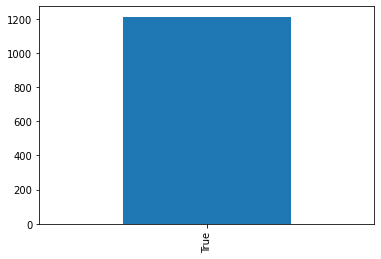

In [ ]:
# 4) Plot the histogram distribution of "Features.Online?";

df['Features.Online?'].value_counts().plot(kind='bar')


**Consideration**


Since the columns ```Features.Handheld?``` and ```Features.Online?``` have no variance (same values for each record) are not interesting for the classification, so I will exclude them from the traing data. <br><br>

**Further columns**

Based on previous analysis I want to understand what are the column filled with a single value and what is the variability of each column.

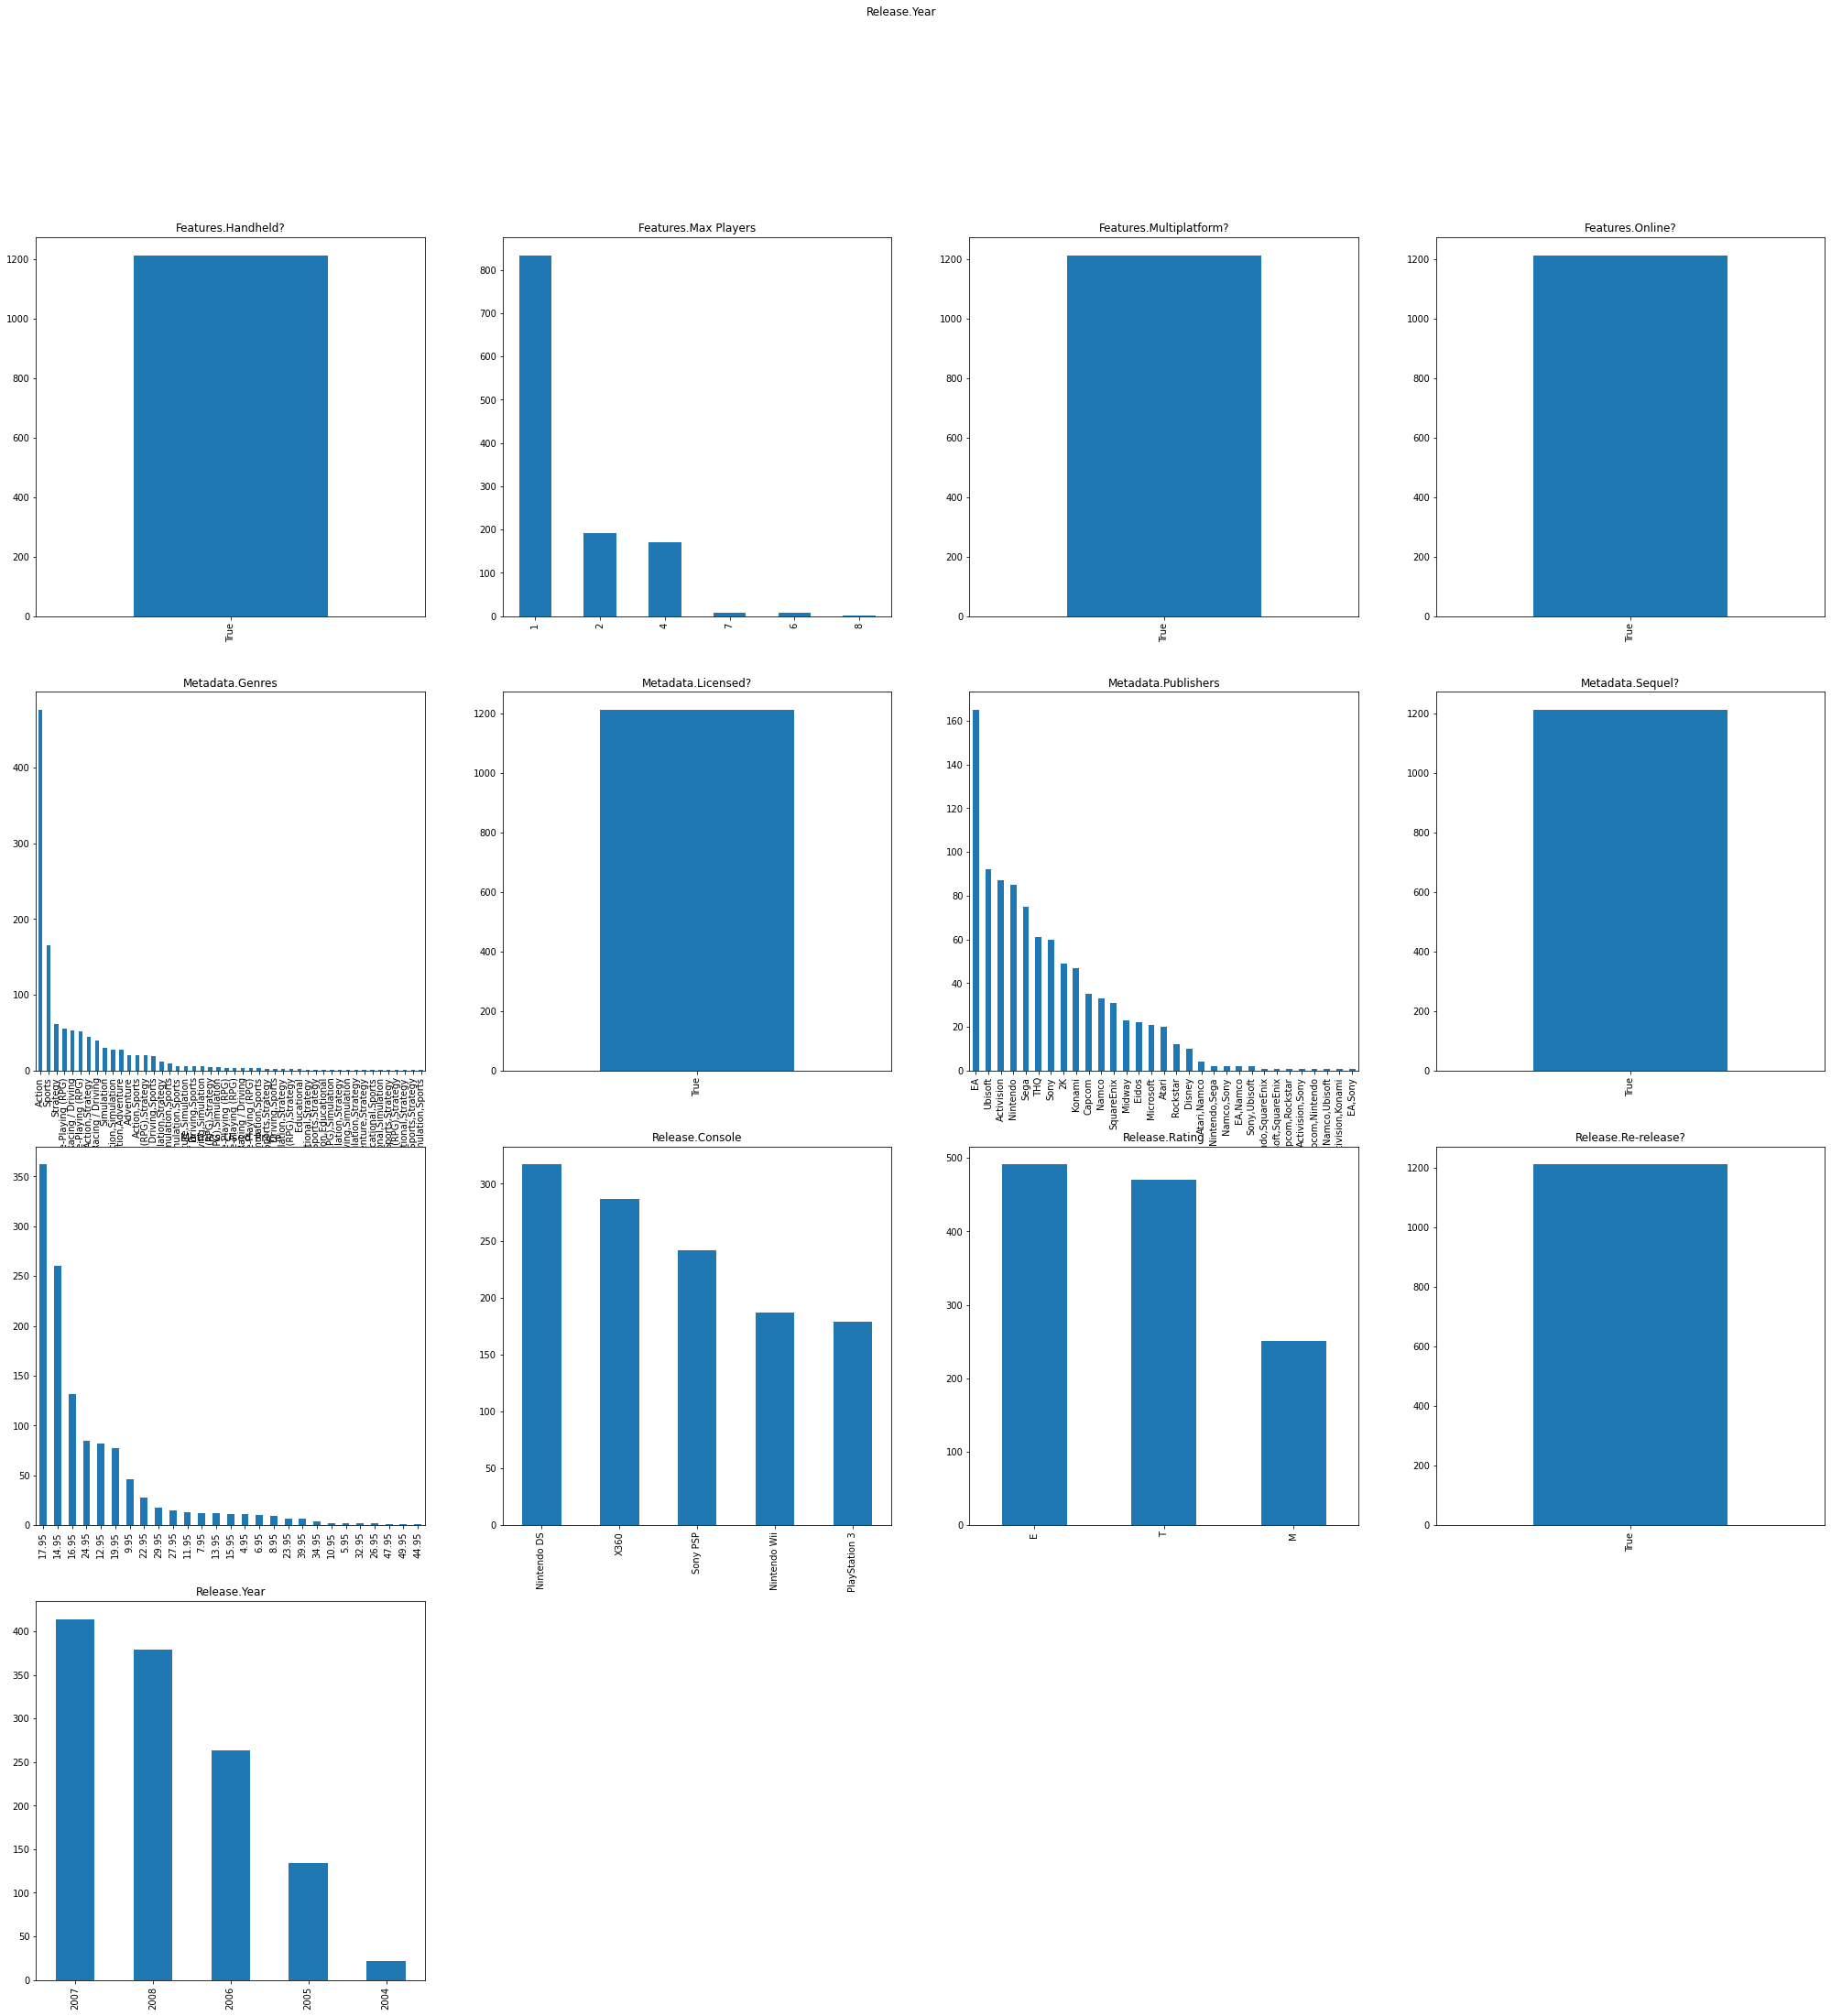

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35,35))
index = 1
for column in df.columns:
  counts = df[column].value_counts()
  # Plot only column with less than 50 different values
  if counts.shape[0] <= 50:
    plt.subplot(4, 4, index)
    index = index + 1
    counts.plot(kind='bar', title=column, subplots=True, layout=(1,1))

## Observation

From the distribution of ```Features.Max Players``` we can see that many games have only one player, a good number have 2 or 4 and only a small part have 6,7 or 8 players.
We could then map 2 new Boolean features "1 player" and another "2-4 player".
"6,7,8" being very few, we do not take them into consideration.


Moreover the column `Release.Rating` is a little unbalanced for the value `M` (about half with respect to others). We will consider this column to be balanced both upsampling the samples with value `M` and downsample the columns with value `E` and `T`

Since we notice that some features are single valued, we write the list of columns that are filled with a single value: these columns are eligible for deletion from the dataset:

In [ ]:
# Print all columns that has a single column: these columns must be removed from model because they are not helpful in our predictive models. 

for column in df.columns:
  counts = df[column].value_counts()
  if counts.shape[0] == 1:
    print(column)

Features.Handheld?
Features.Multiplatform?
Features.Online?
Metadata.Licensed?
Metadata.Sequel?
Release.Re-release?


## Features to remove

The column filled with single value are: 
- Features.Handheld?
- Features.Multiplatform?
- Features.Online?
- Metadata.Licensed?
- Metadata.Sequel?
- Release.Re-release?

# Analysis of Metadata.Publishers

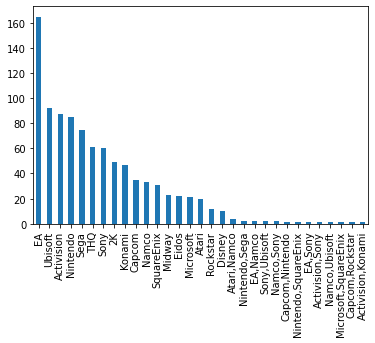

In [ ]:
# 5) Plot the histogram distribution of "Metadata.Publishers";

df['Metadata.Publishers'].value_counts().plot(kind='bar')

Apparently `Metadata.Publishers` column contains a given distribution of publishers. Unlikely some of them are **NaN** as you can see in the following:

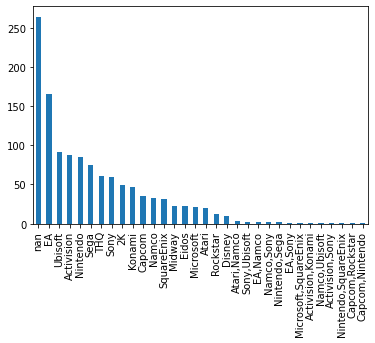

In [ ]:
df['Metadata.Publishers'].value_counts(dropna=False).plot(kind='bar')

# Consideration on Metadata.Publishers feature

The analysis of "Metadata.Publishers" shown that the a huge number of samples has no value for this feature. For example, we can see that it is one and a half times the size of EA. We can choose to use this column and restrict the dataset to the samples that has a value in this column or to avoid to consider this column at all.


I think it is interesting to study the sales trend for each publisher

In [ ]:
a = df[['Metadata.Publishers', 'Metrics.Sales']].groupby(['Metadata.Publishers']).sum().sort_values(by=['Metrics.Sales'])
a

,Metrics.Sales
Metadata.Publishers,
"Microsoft,SquareEnix",0.09
"EA,Sony",0.13
"Nintendo,SquareEnix",0.16
"EA,Namco",0.16
"Sony,Ubisoft",0.30
"Activision,Sony",0.56
"Namco,Ubisoft",0.65
"Capcom,Nintendo",0.69
"Atari,Namco",0.77


In [ ]:
a[a['Metrics.Sales'] > a.quantile(.9, numeric_only=False).to_list()[0]].sum() / a.sum() * 100.0

Metrics.Sales    56.927581
dtype: float64

**observation:** from this data we can understand that **only 10% of companies make about 57.0% of the overall sales volume**.<br>
since the points are not uniformly distributed for this feature, we risk not having good approximations.
we should therefore perform the logarithmic normalization before the regression.

# Further considerations

We will drop also column `Title` because is basically a sample identifier (unique) and `Release.Year` because it does not seem interesting to me at an informative level with respect to the prediction.


# Correlation

Now we clean up unuseful features and we try to understand correlation between feature and dependent variables

In [ ]:
df1 = pd.DataFrame(df)

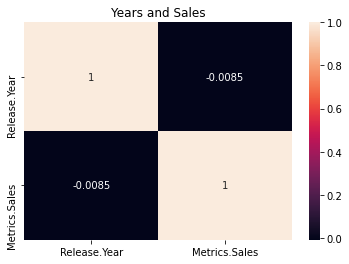

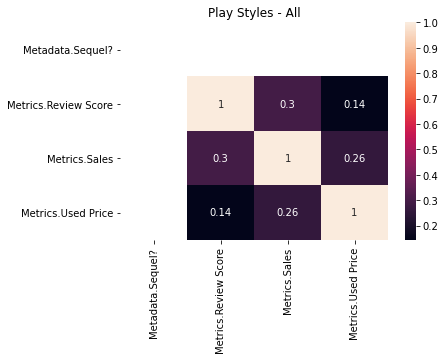

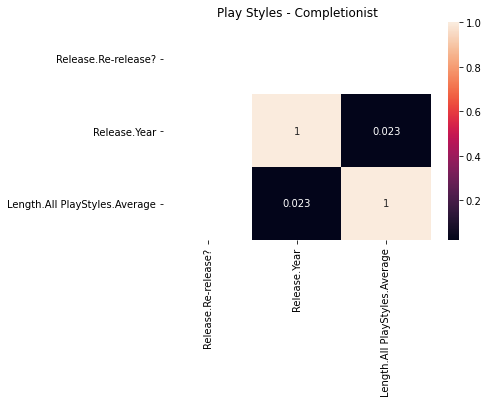

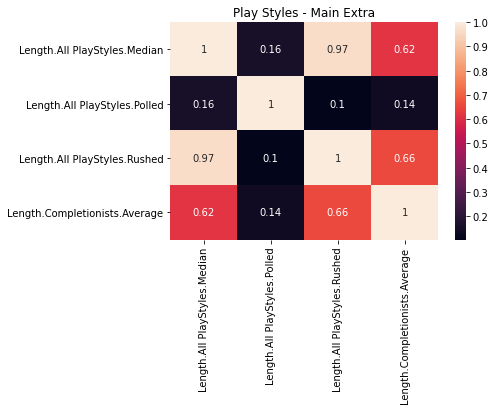

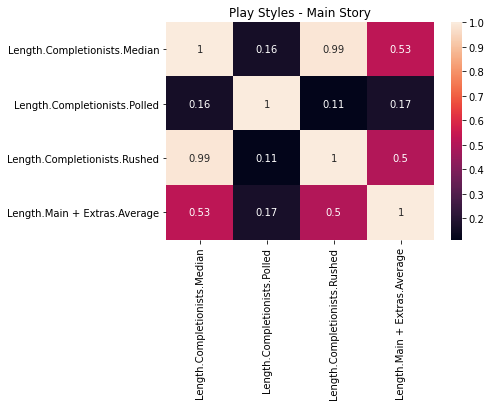

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

features = df1.iloc[:,0]
metadata = df1.iloc[:,1:2]
metrics = df1.iloc[:,3:5]
release = df1.iloc[:,6:7]

lenght_playstyles_all = df1.iloc[:,8:12]
lenght_playstyles_completionist = df1.iloc[:,13:17]
lenght_playstyles_main_extra = df1.iloc[:,18:22]
lenght_playstyles1_main_story = df1.iloc[:,23:27]

years_sales = df[['Release.Year','Metrics.Sales']]
sn.heatmap(years_sales.corr(), annot=True)
plt.title('Years and Sales')
plt.show()

sn.heatmap(lenght_playstyles_all.corr(), annot=True)
plt.title('Play Styles - All')
plt.show()

sn.heatmap(lenght_playstyles_completionist.corr(), annot=True)
plt.title('Play Styles - Completionist')
plt.show()

sn.heatmap(lenght_playstyles_main_extra.corr(), annot=True)
plt.title('Play Styles - Main Extra')
plt.show()

sn.heatmap(lenght_playstyles1_main_story.corr(), annot=True)
plt.title('Play Styles - Main Story')
plt.show()


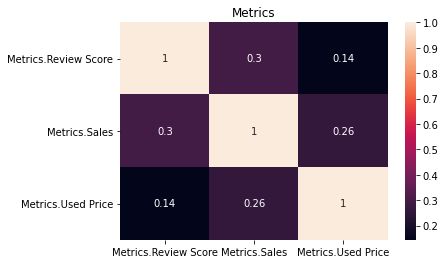

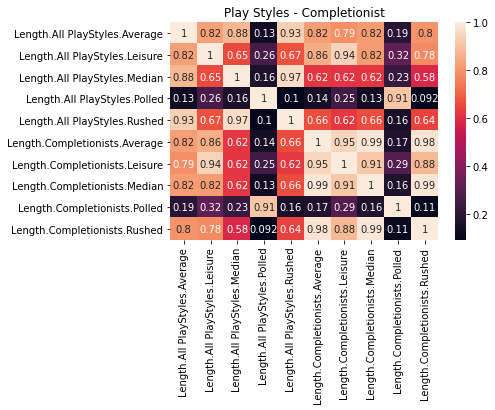

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

features = df.iloc[:,1:5]
metadata = df.iloc[:,5:9]
metrics = df.iloc[:,9:12]
release = df.iloc[:,12:16]
lenght_playstyles_completionist = df.iloc[:,16:26]

sn.heatmap(metrics.corr(), annot=True)
plt.title('Metrics')
plt.show()

sn.heatmap(lenght_playstyles_completionist.corr(), annot=True)
plt.title('Play Styles - Completionist')
plt.show()

**observation:** no correlation between `years` and `sales`.
I also noticed that there's a lot of correlation between `median` and `average` (this therefore indicates a very uniform distribution) in each `Lenght` subset of features.

I decided to drop `Length.All PlayStyles.Average`, `Length.Completionists.Average`, `Length.Main + Extras.Average` and `Length.Main Story.Average` preferring `Median` feature in our predictions.

**working on Target class**

In order to simplify prediction we can bin continuous data of ```Metrics.Review Score``` into intervals. <br>
The method below, is useful for discretizing the value of target column y in n classes. So it bins continuous data into intervals, in any case I will try with 2 different strategy ```uniform``` (all bin in each feature have the same widths in the span of possible values for the variables, it's more flexible) and ```quantile``` (default, all bins in each feature have the same number of values, split based on percentiles).

**observation:** I've choosed 7 bin, because in terms of number of feature (after apply feature reduction) produces less feature.


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

def discretize(df, column, n_bins):
  est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform') #quantile #uniform
  values = df[column].to_numpy()
  values_discretized = est.fit_transform(values.reshape(-1, 1))
  df[column] = values_discretized

In [ ]:
discretize(df, 'Metrics.Review Score', 7)

In [ ]:
# extract target feature (and drop it because the target should not be in the training dataset)

import pandas as pd

def setTargetFeature(df, column):
  if column in df:
    y = df[column].to_numpy()
    return y

In [ ]:
y = setTargetFeature(df, 'Metrics.Review Score')
y

array([5., 6., 5., ..., 2., 3., 1.])

# Unbalancing problem

**using Resampling**

In this section we show how to resample a dataset based on a single table.
As example we show the unbalance of the `Metrics.Review Score` (the outcome of prediction) after its discretization (and this could cause our model to become bias towards selecting the majority group).

In order to balance the size of prediction we wrote the method `resample dataframe` that takes a subset of samples with a given value for the column and add or subtract random samples in order to reach a target number.

The target number in this case, I choose to use the average count of the samples for each class.

To show the effect we show the distribution of the values of the column before and after this resample.

This tecnique is to consider only on training set (after splitting) because the goal is improve the training phase.

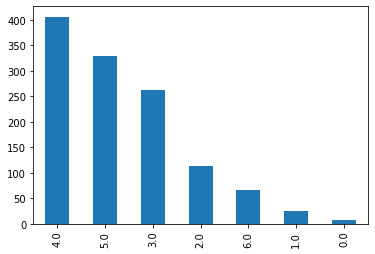

In [ ]:
df['Metrics.Review Score'].value_counts().plot(kind="bar")

In [ ]:
from sklearn.utils import resample
import numpy as np

def resample_dataframe(df, column):
  count = df[column].value_counts()
  avg_value = int(np.floor(np.mean(count.to_numpy())))

  frames = []
  for key in count.keys():
    # Up/Down sample single class
    print(df[df[column] == key].shape)
    df_resampled = resample(df[df[column] == key],
                            replace=True,         # sample with replacement
                            n_samples=avg_value,  # to match majority class
                            random_state=42)      # reproducible results
    print("become", df_resampled.shape)
    frames.append(df_resampled)
  return pd.concat(frames)

In [ ]:
df1 = resample_dataframe(df, 'Metrics.Review Score')

(406, 36)
become (173, 36)
(329, 36)
become (173, 36)
(263, 36)
become (173, 36)
(114, 36)
become (173, 36)
(67, 36)
become (173, 36)
(25, 36)
become (173, 36)
(8, 36)
become (173, 36)


36

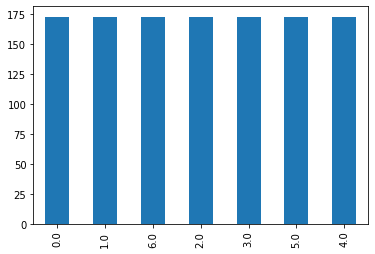

In [ ]:
df1['Metrics.Review Score'].value_counts().plot(kind="bar")
df1.columns.shape[0]

**using SMOTE (or RandomOverSampler in case of exception)**

We will also try the SMOTE technique (Synthetic Minority Over-sampling Technique)only on the training set. <br>
As we can see in fact, some features are unbalanced (publisher, genres) and this can lead to bias on the part of the model.
In this way we will perform an over-sampling of the minority classes. We create new data instances of the minority groups by copying existing minority instances and making little changes to them.
Using this tecnique, improve performance a lot of some model (D-tree for example, below the details).

**using Random UnderSampling** <br>
In this case, we'll delete examples from the majority class in the training set and the major risk is to lose information.
This could lead to underfitting and poor generalization to the test-set.

# Data Preparation

In [ ]:
#here the code regarding the above considerations.

import pandas as pd

def feature_reduction(df):
  
  # Drop unique feature
  df.drop('Title', inplace=True, axis=1)

  # We think that year is not important
  df.drop('Release.Year', inplace=True, axis=1)

  # Drop unuseful columns (single value)
  for to_delete in ["Features.Handheld?", "Features.Multiplatform?", "Features.Online?", "Metadata.Licensed?", "Metadata.Sequel?", "Release.Re-release?"]:
    df.drop(to_delete, inplace=True, axis=1)

  # Based on prev considerations
  df.drop("Metadata.Publishers", inplace=True, axis=1)

  # Based on previous considerations on Average (correlation matrix above)
  df.drop("Length.All PlayStyles.Average", inplace=True, axis=1)
  df.drop("Length.Completionists.Average", inplace=True, axis=1)
  df.drop("Length.Main + Extras.Average", inplace=True, axis=1)
  df.drop("Length.Main Story.Average", inplace=True, axis=1)
  
  # extract the target class
  df.drop('Metrics.Review Score', inplace=True, axis=1)

In [ ]:
feature_reduction(df)

now, we'll use ```get_dummies()``` function for the following categorical columns: ```Metadata.Genres```, ```Release.Console```, ```Release.Rating```.

in this case, I decided to use this function because this features are categorical so we can use this one-hot encoding algorithm to convert string values into dummy or indicator variables.

In [ ]:
def convert_categoricals_to_dummies_values(df):

  df_dummies = pd.DataFrame(df)

  for categorical in ['Metadata.Genres', 'Release.Console']:

    # use pd.concat to join the new columns with your original dataframe
    df_dummies = pd.concat([df_dummies, pd.get_dummies(df[categorical], prefix=categorical)],axis=1)

    # drop the original 'country' column (you don't need it anymore)
    df_dummies.drop([categorical],axis=1, inplace=True)

  return df_dummies

now we've more features because are the result of categorization (we changed all the categorical data into numerical data).

**Release.Rating Feature Categorization (optimization)**

We observed also that the feature `Release.Rating` can have as value, E (everyone), T for teen and M for mature.

We decided to categoryze this feature in two columns: teen and mature where column teen is `1` in case Rating is `T` or `E` and `0` otherwise. mature column is `1` in case Rating is M or E and 0 otherwise.




In [ ]:
import pandas as pd

def rating_teen(x):
  return 1 if x == 'E' or x == 'T' else 0

def rating_mature(x):
  return 1 if x == 'E' or x == 'M' else 0

def categorize_rating(df):
  rating = pd.DataFrame(df['Release.Rating'].transform([rating_teen, rating_mature]))
  df = df.drop('Release.Rating', axis=1)
  df = pd.concat([df, rating], axis=1)
  return df

**Standardization: Standard Scaler**

Apply Feature Scaling, in this way we can scale some numerical features in the dataset.
A good reason to apply Scaler is that gradient descent converges much faster with feature scaling than without it. The standard scaler centers in the mean and divides by the variance therefore all values beyond the standard deviation (the outliers) will be found within the extremes and the standard scaler therefore favors the mean of the values. By discretizing the target feature 'Score', I don't need to apply scaling on `y` column. 
We treat scaling method as an hyperparameter: we will analyze predicting capability of classifier with and without this preprocessing.

Further observation: I do not consider appropriate apply scaling on categorial features introduced above.

In [ ]:
from sklearn.preprocessing import StandardScaler

def feature_scaling(df_to_scaling):
  columns = ['Features.Max Players',
             'Metrics.Sales',
             'Length.All PlayStyles.Median',
             'Length.All PlayStyles.Polled',
             'Length.All PlayStyles.Rushed',
             'Length.Completionists.Median',
             'Length.Completionists.Polled',
             'Length.Completionists.Rushed',
             'Length.Main + Extras.Median',
             'Length.Main + Extras.Polled',
             'Length.Main + Extras.Rushed',
             'Length.Main Story.Median',
             'Length.Main Story.Polled',
             'Length.Main Story.Rushed',
             'Length.All PlayStyles.Leisure',
             'Length.Completionists.Leisure',
             'Length.Main + Extras.Leisure',
             'Length.Main Story.Leisure']
           
  sc = StandardScaler()
  df_scaled = df_to_scaling
  df_scaled[columns] = sc.fit_transform(df_scaled[columns])
  return df_scaled

**Normalization**

Since the ```Used Price``` feature shown some 'outliers' (given past analysis) we decided to apply normalization to it.<br>

In this way, normalization will make the distribution more uniform (between 0 and 1) and the feature will be more consistent with each other (and the best conditions for convergence).

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from IPython.display import display
import numpy as np

def feature_normalize(df, column):
  x_array = np.array(df[column])
  normalized_feature = preprocessing.normalize([x_array])
  df[column] = normalized_feature.reshape(-1, 1)

In [ ]:
df_dummies = convert_categoricals_to_dummies_values(df)

# normalize the column into df_dummies
feature_normalize(df_dummies, 'Metrics.Used Price')

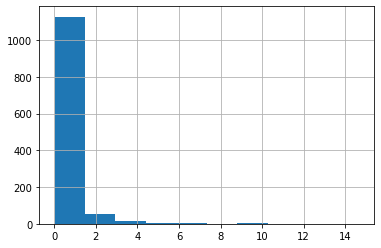

In [ ]:
# Sales has a long tail distribution
df['Metrics.Sales'].hist()

**observation:** intuitively, ```Sales``` is an important feature. As we can see from the distribution, has a ***long tail distribution***.
this feature is more skewed and it seems a log-normal distribution.
In this case, I've tried to use a different normalization

In [ ]:
def feature_normalize_logscale(df, column):
  x_array = np.array(df[column])
  normalized_feature = preprocessing.normalize([np.log(x_array)])
  df[column] = normalized_feature.reshape(-1, 1)

In [ ]:
feature_normalize_logscale(df, 'Metrics.Sales')

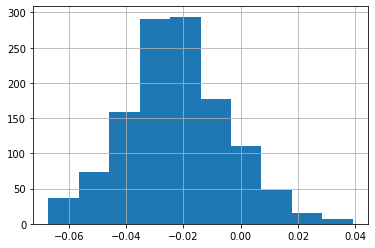

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

df['Metrics.Sales'].hist()

***Feature Importance using Linear Regression***

Feature importance assigns a score to input features based on how useful they are at predicting a target variable. It's a good practice to select the features from training set.
In my case I decided to get only features with positive importance > *threshold* (but it may make sense to consider the percentile rather than a numerical threshold).
<br>In this way I'll try to reduce the number of input features.<br>
both Linear regression and Decision tree finds a set of coefficients (found for each input variable) to use in the weighted sum in order to make a prediction.

In [ ]:
import sklearn

def feature_importance_linear_regression(X_train, y_train, X_test, threshold):
  # we use the linear regression feature importance
  from sklearn.linear_model import LinearRegression

  from matplotlib import pyplot

  # define the model
  model = LinearRegression()
  # fit the model
  model.fit(X_train, y_train)
  # get importance
  importance = model.coef_

  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
  # plot feature importance
  pyplot.bar([x for x in range(len(importance))], importance)
  pyplot.show()

  return X_train[:, np.abs(importance) > threshold], X_test[:, np.abs(importance) > threshold]

***Feature Importance using Decision Tree Classifier ***

A little limitation is that correlated features will be given equal or similar importance.
```selectFromModel``` by default, will select those features which importance is greater than the mean importance of all the features

In [ ]:
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy 

def feature_importance_dtree(X_train, y_train, X_test):
  # decision tree for feature importance on a classification problem
  from sklearn.datasets import make_classification
  from sklearn.tree import DecisionTreeClassifier
  from matplotlib import pyplot

  # define the model
  model = SelectFromModel(DecisionTreeClassifier())
  # fit the model
  model.fit(X_train, y_train)

  # get importance
  importance = model.estimator_.feature_importances_

  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
  # plot feature importance
  pyplot.bar([x for x in range(len(importance))], importance)
  pyplot.show()

  return model.transform(X_train), model.transform(X_test)

<hr>

## 3. Classification (up to 7/8 points)
In this part of the tutorial you are requested to perform all the necessary steps required in order to design a full fledged classification task on the <b>Metrics.Review Score</b>.

You are requested to perform the following steps having in mind the following: 

1) the dataset must be properly splitted to perform crossvalidation during model selection/hyper parameter tuning and to test during the evaluation step 

2) features must be properly encoded

3) the target feature can be dicretized <b>(number of classes must be greater than 5)</b> in order to simplify the problem;

4) for model selection you are requested to consider: 
    - Decision Trees
    - Support Vector Machines;
    - An ensamble methodology;
    - MLPNs.
5) during model selection hyper-parameter tuning must be performed and discussed;

6) class imbalancing must be addressed (when appropriate);

7) remember to apply standardizion and normalization when appropriate;

8) provide a discussion of model selection where you describe the differences in terms of performance and explains the root causes;

9) describe the measure adopted for the evaluation and discuss the results;

#### 3.1 Preprocessing (up to 2/8 points)
Write the necessary code to perfrom an adequate prepocessing, <b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

### Complete Pipeline

The code below allows to generate different type of datasets to train different model.<br>
In particular, we can standardize, normalize, use feature reduction, splitting (so as to divide into train and test data) in which 20% of the data to the end of the dataset will be used for testing oversampling etc.

#### Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import logging

# load dataset
df = pd.read_csv("video_games.csv")

# pre Processing
def pre_processing_data(df):
  feature_reduction(df)
  df = convert_categoricals_to_dummies_values(df)
  
  df = categorize_rating(df)
  return df
  
def start_pipeline(scaling, importance, normalization, resampling, smoteOrOverSampler, underSampling):

  if not "Metrics.Review Score" in df.columns:
    logging.error('Run the above script again (reload dataset, pre-processing, etc.')
    return []

  #set my target and discretize it
  discretize(df, 'Metrics.Review Score', 7)
  y = setTargetFeature(df, 'Metrics.Review Score')

  feature_normalize_logscale(df, 'Metrics.Sales')

  if resampling == True:
    df_resampled = resample_dataframe(df, 'Metrics.Review Score')
    df_cleaned = df_resampled

  # clean data (discretize, feature reduction, encoding)
  df_cleaned = pre_processing_data(df)

  X = df_cleaned.to_numpy()

  if scaling == True:
    scaled = feature_scaling(df_cleaned)
    X = scaled.to_numpy()
  
  if normalization == True:
    if scaling is False:
      feature_normalize(df_cleaned, 'Metrics.Used Price')
      X = df_cleaned.to_numpy()
    else:
      feature_normalize(scaled, 'Metrics.Used Price')
      X = scaled.to_numpy()

  # Split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # 42

  # Balancing
  if smoteOrOverSampler == True:
    try:
      smt = SMOTE(random_state=42)
      X_train, y_train = smt.fit_resample(X_train, y_train)
    except ValueError:
      ros = RandomOverSampler(random_state=42)
      X_train, y_train = ros.fit_resample(X_train, y_train)
  
  if underSampling == True:
    rus = RandomUnderSampler(sampling_strategy='majority')
    X_train, y_train = rus.fit_resample(X_train, y_train)

  # Importance
  if importance == 'dtree':
    X_train, X_test = feature_importance_dtree(X_train, y_train, X_test)
  if importance == 'linear_regression':
    X_train, X_test = feature_importance_linear_regression(X_train, y_train, X_test, 0.01)

      
  return [X, y, X_train, X_test, y_train, y_test]

we now will proceed to avaluate a set of classifier in order to find the best predictor. For each model we will preprocess data using the pipeline method and appropriate configuration of hyperparameters.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Feature: 0, Score: 0.02243
Feature: 1, Score: 0.11498
Feature: 2, Score: 0.09030
Feature: 3, Score: 0.03537
Feature: 4, Score: 0.02100
Feature: 5, Score: 0.06650
Feature: 6, Score: 0.03405
Feature: 7, Score: 0.00925
Feature: 8, Score: 0.01323
Feature: 9, Score: 0.02495
Feature: 10, Score: 0.01692
Feature: 11, Score: 0.01448
Feature: 12, Score: 0.01568
Feature: 13, Score: 0.10724
Feature: 14, Score: 0.01347
Feature: 15, Score: 0.02002
Feature: 16, Score: 0.01340
Feature: 17, Score: 0.03220
Feature: 18, Score: 0.02857
Feature: 19, Score: 0.03063
Feature: 20, Score: 0.00562
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00816
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00083
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00188
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

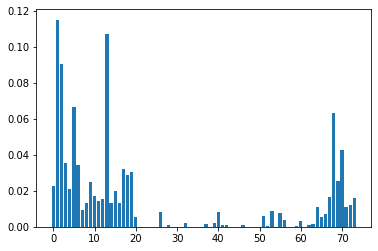

Number of samples 2282
Number of features 21


In [ ]:
X, y, X_train, X_test, y_train, y_test = start_pipeline(scaling=True,
                                                        importance='dtree', #dtree #linear_regression
                                                        normalization=True,
                                                        resampling=False,
                                                        smoteOrOverSampler=True,
                                                        underSampling = False)

print("Number of samples", X_train.shape[0])
print("Number of features", X_train.shape[1])

# if you want run again `start_pipeline` function, please run again the code block preceding this

## 3.2 Model Selection  (up to 3/8 points)
Write the necessary code to perfrom an adequate model selection. tips: for some models you may need to perform additional preprocessing steps (encoding, normalization, feature selection, class balancement, ...).
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and discussion correpsonds to 0 POINTS</b>

We applied GridSearch as hyper parameters tuning methodology.
We racall that ```best_score_``` is the average of all cv folds for a single combination of the parameters we specify in the ```tuned_params```.
GridSearch splits up our test set in equally sized parts, uses one part as test data and the rest as training data.
The ```cv``` param is the related to cross validation.

##### Decision Tree

In order to evaluate our cleaned dataset with decision tree we decided to skip feature scaling because it does not require it. <br>
In fact, trees aren't affected by scaling because the splitting criterion first orders the values of each feature and then calculate the gini\entropy of the split.

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def perform_tree_classifier(scoring):
  pipe = Pipeline(steps=[('dec_tree', tree.DecisionTreeClassifier())])

  criterion = ['gini', 'entropy']
  max_depth = [2,4,6,8,10,12]

  parameters = dict(dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

  grids_dtree = GridSearchCV(pipe, parameters, cv=5, scoring=scoring)
  grids_dtree.fit(X_train, y_train)
  y_pred_dtree = grids_dtree.best_estimator_.predict(X_test)

  print("Best fit parameters for [scoring %s] Decision tree:" % scoring, grids_dtree.best_params_)
  print("best score Decision tree: ", grids_dtree.best_score_)

  return grids_dtree, y_pred_dtree

In [ ]:
grids_dtree, y_pred_dtree = perform_tree_classifier('accuracy')

Best fit parameters for [scoring accuracy] Decision tree: {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 12}
best score Decision tree:  0.6608612614687704


**observation:** from the confusion matrix generated in the next chapter, it is evident that the value "4" is often misclassified. <br>
So I want to try tuning the parameters augment positive samples using `Recall` as `scoring` function in the Grid Search.
We'll use `weighted` avarage that calculates metrics for each label, and find their average weighted by support.

In [ ]:
grids_dtree_recall_opt, y_pred_dtree_recall_opt = perform_tree_classifier('recall_weighted')

Best fit parameters for [scoring recall_weighted] Decision tree: {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 12}
best score Decision tree:  0.664370033398595


##### SVM

SVM (Support Vector Machine) has a quadratic complexity in training phase, so in this case, I decided to use ```feature reduction``` (with importance).

Polynomial SVC (~ 0.37) performs worse than linear (~0.46). It could be a case of overfitting. In practice the polynomial separates the sets better but in the end, it is not able to generalyze well. <br><br> Radial Basis Function seems to perform better (I tried different cross-validation splitting, number of fold from 4 to 6).

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA

pipe_steps = [('SupVM', SVC())]
check_params = {
    'SupVM__kernel': ['rbf'], #['rbf'], # linear # poly (in this case we must remove C and Gamma params)
    'SupVM__C': [0.1, 0.5, 1, 10, 30, 40, 60],
    'SupVM__gamma': [0.001, 0.005, 0.01, 0.005, 1, 5, 10]
}

pipeline = Pipeline(pipe_steps)

for cv in tqdm(range(4,6)):
  grids_svm = GridSearchCV(pipeline, param_grid=check_params, cv=cv, scoring='accuracy')
  grids_svm.fit(X_train, y_train)
  y_pred_svm = grids_svm.best_estimator_.predict(X_test)
  print("score for %d fold CV := %3.2f" %(cv, grids_svm.score(X_test, y_test)))
  print("Best-Fit parameters: ", grids_svm.best_params_)
  print("best score SVM: ", grids_svm.best_score_)

score for 4 fold CV := 0.30
Best-Fit parameters:  {'SupVM__C': 40, 'SupVM__gamma': 1, 'SupVM__kernel': 'rbf'}
best score SVM:  0.7533113651027744
score for 5 fold CV := 0.28
Best-Fit parameters:  {'SupVM__C': 10, 'SupVM__gamma': 1, 'SupVM__kernel': 'rbf'}
best score SVM:  0.7616386425582556



#####ENSAMBLE (Gradient Boosting)

Boosting combines a set of weak learners and generates improved prediction accuracy.

I've decided to use Gradient Boosting classifier like an ensamble method.
<br><b>n_estimators</b> is related to the number of weak learnears.
<br><b>learning rate</b> is a sort of trade-off between learning_reate and n_estimators. It controls the contribution of single weak learnears in the final combination.
<br><b>max_depth</b> maximum depth of individual regression estimators. This parameter limits the number of nodes in the tree.

**impressions**: lowering the learning rate we get more precise predictions (from 0.50 to 0.56) but maybe we converge more slowly. It is recommended to repeat the boosting gradient even with lower learning rate values but with a greater number of iterations in order to verify convergence.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth":[1,3, 5, 8],
    "n_estimators":[40, 70, 100]
}

gradient_boosting_classifier = GradientBoostingClassifier()
grids_ensamble = GridSearchCV(gradient_boosting_classifier, parameters, scoring='accuracy')
grids_ensamble.fit(X_train, y_train)
y_pred_ensamble = grids_ensamble.best_estimator_.predict(X_test)
print("Best fit parameters Ensable (Boosting):", grids_ensamble.best_params_)
print("best score Ensable (Boosting):", grids_ensamble.best_score_)

Best fit parameters Ensable (Boosting): {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 100}
best score Ensable (Boosting): 0.7520173519137012


We tried to tune `max_depth` and the loss function to have best performance.

We tried to tune both type parameters ```Tree-Specific``` and ```Boosting``` and I paid attention on ```n_estimators``` (the number of sequential trees to be modeled) to avoid overfit.
Lower the ```learning_rate``` and increase ve he estimators proportionally to get more robust models.

I note that gradient boosting is the only algorithm that can also predict the target value `1`

##### MLP

I've used a gridy approach (GridSearch) and K-fold for this classifier.
For some functions of activations and combinations of hidden layers, it seems not to converge but with a gridy way, it seems to be better using: 
`{'activation': 'relu', 'hidden_layer_sizes': (50, 150, 50), 'solver': 'sgd'}`
In fact, adam solver, Stochastic Gradient Descent is a good approch in cases like ours (classify instances in more classes - multiclass). <br>
I've tried to augment the numer of max num of iterations and hidden layer number to improve it.
In this case, the use of the gradient leads to a high oscillation that does not produce convergence.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(steps=[('mlp', MLPClassifier())])

parameters = dict(
                  mlp__activation=['logistic', 'relu', 'tanh'],
                  mlp__solver=['sgd', 'adam'],
                  mlp__hidden_layer_sizes= [(60),(100),(50,100,50), (50,150,50)],
                  mlp__max_iter=[1000],
                  mlp__alpha=[0.01, 0.05, 0.001],
                  mlp__learning_rate=['constant','adaptive'],
                  mlp__tol=[1e-9])

grids_mlp = GridSearchCV(pipe, parameters, cv=5, scoring='accuracy')
grids_mlp.fit(X_train, y_train)
y_pred_mlp = grids_mlp.best_estimator_.predict(X_test)

print("Best parameters set found on development set:")
print(grids_mlp.best_params_)
print("best score MLP: ", grids_mlp.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Best parameters set found on development set:
{'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50, 150, 50), 'mlp__max_iter': 1000, 'mlp__solver': 'sgd', 'mlp__tol': 1e-09}
best score MLP:  0.6866981458021421


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 3.3 Evaluation (up to 2/8 points)
Write the necessary code to perform an adequate model evaluation of the selected model. Confusion matrix and classsification reports are welcome. 
<b>REMEMBER to describe with your own words each step. Perfectly working code with no comments and no discussion correpsonds to 0 POINTS</b>

Before seeing the models evaluated, let's remember that intuitively:
- ```precision``` is the capacity of our classifier not to label as Positive a sample that is Negative.
- ```recall``` is the ability of our classifier to find all Positive sample.
- ```f-score``` is the harmonic mean of the precision and recall (1 as a best value and 0 for worst value)
- ```support``` is the number of samples of the true responses that lie in that class (y). 

#####**Decision tree evaluation**

now, we'll try to create a confusion matrix to evaluate the quality of the output of our classifier (d-tree in this case) on our dataset.
In this way the number of correct and incorrect predictions are summarized with count values and broken down by each class.
let's see the trend related to decision tree algorithm.
We plot normalized matrix too (normalization by class support size (number of elements in each class).
This kind of normalization can be intersting in case of class inbalance to have a more visual interpretation of which class is being misclassified.

We remember that the diagonal elements represent the number of points for which the predicited label is equal to the true label.

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.11      0.20      0.14         5
         2.0       0.25      0.28      0.26        25
         3.0       0.33      0.35      0.34        57
         4.0       0.42      0.34      0.38        80
         5.0       0.40      0.44      0.42        55
         6.0       0.53      0.45      0.49        20

    accuracy                           0.36       243
   macro avg       0.29      0.29      0.29       243
weighted avg       0.38      0.36      0.37       243

88


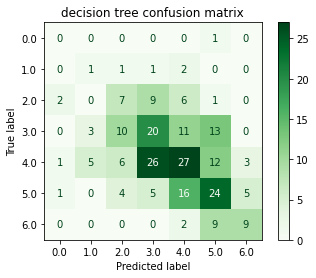

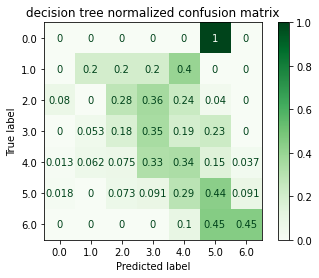

In [ ]:
#decision tree confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

disp = plot_confusion_matrix(grids_dtree.best_estimator_, X_test, y_test, cmap=plt.cm.Greens)
disp.ax_.set_title('decision tree confusion matrix')

disp_normalized = plot_confusion_matrix(grids_dtree.best_estimator_, X_test, y_test, cmap=plt.cm.Greens, normalize='true')
disp_normalized.ax_.set_title('decision tree normalized confusion matrix')

# decision tree Accuracy
print(classification_report(y_test, y_pred_dtree))
print(accuracy_score(y_test, y_pred_dtree, normalize=False))

in this case I don't applicate SMOTE and scaling tecniques because Dtree are invariant to scaling of inputs and classification is not impacted by the outliers in the data because the data is split using scores (that proportionally calculates in proportion of points).

I tried the 2 types of feature reduction and linear regression seems to have a slight improvement in accuracy (~ 0.38%) but it can also depend on the fact that it selects a larger number.

and below are the values of the `GridSearch` as a function of the `Recall` scoring

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.11      0.20      0.14         5
         2.0       0.24      0.32      0.28        25
         3.0       0.31      0.30      0.30        57
         4.0       0.48      0.40      0.44        80
         5.0       0.43      0.45      0.44        55
         6.0       0.58      0.55      0.56        20

    accuracy                           0.39       243
   macro avg       0.31      0.32      0.31       243
weighted avg       0.40      0.39      0.39       243



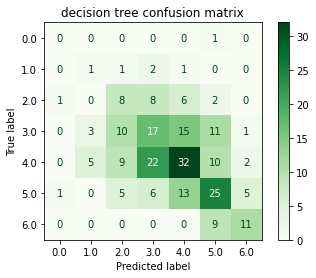

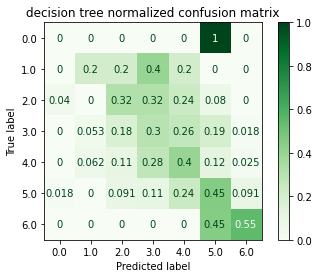

In [ ]:
#decision tree confusion matrix (scoring Recall)

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

disp = plot_confusion_matrix(grids_dtree_recall_opt.best_estimator_, X_test, y_test, cmap=plt.cm.Greens)
disp.ax_.set_title('decision tree confusion matrix')

disp_normalized = plot_confusion_matrix(grids_dtree_recall_opt.best_estimator_, X_test, y_test, cmap=plt.cm.Greens, normalize='true')
disp_normalized.ax_.set_title('decision tree normalized confusion matrix')

# decision tree Accuracy
print(classification_report(y_test, y_pred_dtree_recall_opt))

`Recall`, is now increased and the number of misclassified (in case of `4` has reduced)

#####**SVM Evaluation**

It is interesting to note that SVM, having a quadratic complexity (unlike the D-tree for example), I used a dataset with a feature reduction.
This reduced training time while accuracy remained stable at around 0.42%

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         5
         2.0       0.12      0.16      0.14        25
         3.0       0.25      0.23      0.24        57
         4.0       0.34      0.26      0.30        80
         5.0       0.32      0.47      0.38        55
         6.0       0.43      0.15      0.22        20

    accuracy                           0.28       243
   macro avg       0.21      0.18      0.18       243
weighted avg       0.29      0.28      0.27       243



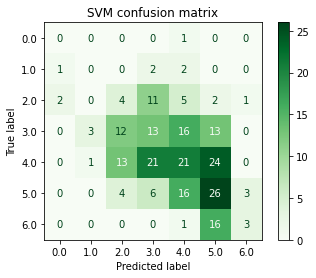

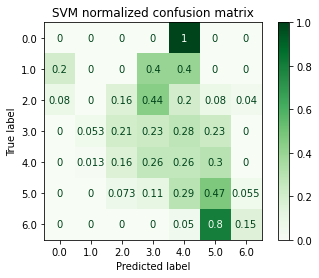

In [ ]:
#SVM confusion matrix

from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(grids_svm.best_estimator_, X_test, y_test, cmap=plt.cm.Greens)
disp.ax_.set_title('SVM confusion matrix')

disp_normalized = plot_confusion_matrix(grids_svm.best_estimator_, X_test, y_test, cmap=plt.cm.Greens, normalize='true')
disp_normalized.ax_.set_title('SVM normalized confusion matrix')

print(classification_report(y_test, y_pred_svm))

#####**Ensamble Evaluation**

In this case I've used a normalize dataset (even if boosting don't require feature normalization because it uses multiple decision tree) either way I noticed no difference on performance.

using undersampling drastically decreases the training time but also the accuracy decreases about 6%

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.20      0.20      0.20         5
         2.0       0.41      0.36      0.38        25
         3.0       0.41      0.42      0.42        57
         4.0       0.49      0.47      0.48        80
         5.0       0.37      0.44      0.40        55
         6.0       0.67      0.50      0.57        20

    accuracy                           0.44       243
   macro avg       0.36      0.34      0.35       243
weighted avg       0.44      0.44      0.44       243

best score:  0.7520173519137012


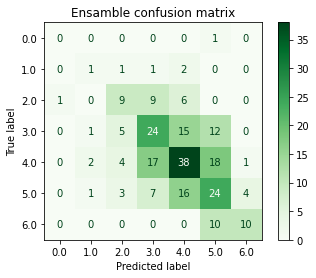

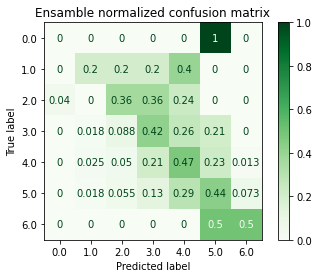

In [ ]:
#Ensamble confusion matrix

from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(grids_ensamble.best_estimator_, X_test, y_test, cmap=plt.cm.Greens)
disp.ax_.set_title('Ensamble confusion matrix')

disp_normalized = plot_confusion_matrix(grids_ensamble.best_estimator_, X_test, y_test, cmap=plt.cm.Greens, normalize='true')
disp_normalized.ax_.set_title('Ensamble normalized confusion matrix')

print(classification_report(y_test, y_pred_ensamble))
print("best score: ", grids_ensamble.best_score_)

#####**MLP Evaluation**

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         5
         2.0       0.23      0.40      0.29        25
         3.0       0.26      0.26      0.26        57
         4.0       0.44      0.31      0.36        80
         5.0       0.33      0.35      0.34        55
         6.0       0.56      0.45      0.50        20

    accuracy                           0.32       243
   macro avg       0.26      0.25      0.25       243
weighted avg       0.35      0.32      0.33       243



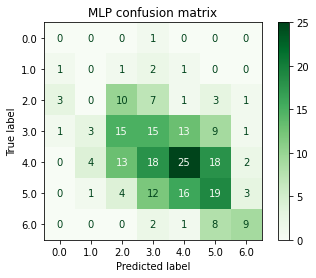

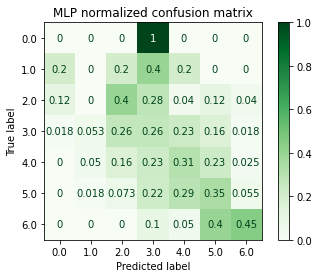

In [ ]:
#MLP confusion matrix

from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(grids_mlp.best_estimator_, X_test, y_test, cmap=plt.cm.Greens)
disp.ax_.set_title('MLP confusion matrix')

disp_normalized = plot_confusion_matrix(grids_mlp.best_estimator_, X_test, y_test, cmap=plt.cm.Greens, normalize='true')
disp_normalized.ax_.set_title('MLP normalized confusion matrix')

print(classification_report(y_test, y_pred_mlp))

### 4. Summary
Provide a summary discussion of your solution <b>(at least 500 words)</b>.<b>This is a mandatory step</b><br><br>

**Data** <br>
This study was carried out with a single dataset of videogame titles with the aim of understanding which game can become among the best and therefore of great rewards.

**Purpose**<br>
The purpose of this study is to find the best model for predicting the overall Score of a video game given properties like `publisher`, `sales` and others informations.

**Observations**<br>
Looking at data is easy to see that there is a strong relation between Score (the dependend variable), Publishers and Sales volume. In fact, by analyzing the quantile, it is possible to note that only 10% of publishers produce almost 60% of the total sales present in the whole dataset.

**Analysis and pre processing** <br>
We started analyzing the features filled with a single value. After seeing distribution plot it was possible to notice how many them are and therefore it was possible to eliminate them: eg `Features.Handheld?`, `` Features.Online? ``, `Metadata.Licensed?`, etc.

Plotting the distributions of the individual features, we can see that some of these were unbalanced.
Analyzing for example the `Metadata.Publishers` feature we see how "EA" overall titles are about double than the others but after a deeper analysis, we see that many of the values ​​are also `NaN`. We therefore decided not to consider this feature in modeling the problem.

Another column that is not very useful in our opinion is `Release.Year` since its correlation factor is very close to 0. Same observation is valid for `Title`.

I also made some optimizations on the feature `Release.Rating` whose value `E` could be included in the further values (`M` and `T`).

During the preprocessing, we had the need to perform Scaling and Normalization (both linear and logarithmic). Since we observed that small changes in score are related to logaritmic growth of Sales we decided to apply the logaritmic normalization to the ``Metrics.Sales`` feature.

We carried out feature selection in order to improve the scalability of some models using alternatively DecisionTree and Linear Regression. <br>

In training phase, I've encountered an exception related to number of neighbors > number of samples, in this case SMOTE doesn't work.
The problem is related to ratio between number of classes and number of samples. In our case, (after encoding) we've approximately 79 classes and 1212 samples in the training set, so we've on average 15 samples per class. SMOTE goes in exception because probably the data are not perfectly balanced and so there are classes with less than 6 samples (default value of neighbor param in SMOTE algorithm). In this case we would have different solutions, for example tuning the neighbor param calculating the minimum number of samples among the 79 classes. I have however decided to use RandomOverSampler class wich doesn't have this restriction.

<br>**Models performed**<br>
Before show the deeper analysis of the models performances we want to underline that the average accuracy that we reached is around ``.5``.

  - ***Decision tree***<br>
We dind't use scaling as the trees are not affected.
Using SMOTE (that create a synthetic samples, over sampling) I had a good improvement on Decision Tree (from ~0.32 to ~0.37 of accuracy).
There are no major variations in accuracy using oversampling.
I reduced the false positives by changing the scoring (using `Recall` scoring function of the gridsearch).

  - ***SVM***<br>
this algorithm has a quadratic complexity in the training phase and in this regard I performed some tests with the different types of classifiers for feature reduction (the decisionTree was better).
I also applied the SMOTE technique on an unbalanced dataset improving the accuracy, in fact distance-based classifiers like SVM, KNN, and MLP(neural network) dramatically benefit from scaling and SMOTE.
The best is the one with the "Radial Basis Function" kernel.

  also, using ```selectFromModel``` described above, I increased the accuracy from ~0.38 to ~0.42 (without oversampling techniques.

  - ***Gradient Boosting***<br>
Currently it is the best classifier with 0.43% accuracy using SMOTE.
using under sampling, accuracy decreases about 6%.

  - ***Multi Layer Perceptron***<br>
Unfortunately it does not seem to converge despite the tuning of some parameters such as hidden layers and the maximum number of iterations.
I've applied SMOTE for the same reason as described above.

**Conclusion**<br>
`Decision trees` had a good training-time and an accuracy that does not differ much from SVM and MLP (around 0.36).
Decision trees tend to overfit the training data, in that regard, I tried to do a good job on feature reduction.
Our accuracy is stable on ~0.37 <br>

About `SVM`, Radial Basis Function seems to perform better (0.3) tuning parameters ```gamma``` and ```C```. <br>
```Gamma``` defines "how far the influence (low values meaning 'far') of single training example reaches".<br>
```C``` the larger value the smaller acceptance margin it has.
also in this case, SMOTE oversampling helped us with SVM.

`MLP`, neural network converges with a minimum of hidden layers equal to (50,100,50) and a maximum of (100,500,100). Beyond this threshold, I've experienced decreases in accuracy.
In any case, the stochastic gradient descent (backpropagation algorithm) seems to be the best approach (~36% of accuracy).

However this approach requires a very long training time due to a high number of hyperparameters such as the regularization parameter and the number of iterations as well as the sensitivity to scaling.

`Gradient Boosting` turns out to be the best classifier.
This technique that combines several base models in order to produce one optimal predictive model seems to be the best model in terms of accuracy and precision (~0.43) compared to linear and polinomial boosting but also compared to the other classifiers listed here. <br>

**Future Improvements**<br>
Certainly the small dataset (about 1200 records) does not help us in the accuracy phase, therefore increasing the real size would certainly be good, thus avoiding entering synthetic data (with oversampling techniques).

It would also be advisable to use both undersampling and oversampling techniques on the same training set and observing the results.

A further improvement could be to use different scoring functions in the hypertuning phase for each classifier